# IA2025 - Autoencoder KERAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

input_dim = 784

x_train_flattened = x_train_normalized.reshape((len(x_train_normalized), input_dim))
x_test_flattened = x_test_normalized.reshape((len(x_test_normalized), input_dim))

print("Shape of normalized and flattened training data:", x_train_flattened.shape)
print("Shape of normalized and flattened testing data:", x_test_flattened.shape)

Shape of normalized and flattened training data: (60000, 784)
Shape of normalized and flattened testing data: (10000, 784)


## Build the autoencoder model

### Subtask:
Define the encoder and decoder architecture using Keras Functional API.


In [5]:
# Define the encoder
encoder_input = Input(shape=(input_dim,), name='encoder_input')
x = Dense(128, activation='relu')(encoder_input)
x = Dense(64, activation='relu')(x)

latent_dim = 32

encoder_output = Dense(latent_dim, activation='relu', name='encoder_output')(x)
encoder = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')

# Define the decoder
decoder_input = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(64, activation='relu')(decoder_input)
x = Dense(128, activation='relu')(x)
decoder_output = Dense(input_dim, activation='sigmoid', name='decoder_output')(x)
decoder = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')

# Define the autoencoder
autoencoder_input = Input(shape=(input_dim,), name='autoencoder_input')
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(inputs=autoencoder_input, outputs=decoded, name='autoencoder')

autoencoder.summary()
encoder.summary()
decoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_output (Dense)          │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = autoencoder.fit(x_train_flattened, x_train_flattened,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_flattened, x_test_flattened))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.3408 - val_loss: 0.1642
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1560 - val_loss: 0.1325
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1304 - val_loss: 0.1202
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1194 - val_loss: 0.1133
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1131 - val_loss: 0.1087
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1088 - val_loss: 0.1048
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1054 - val_loss: 0.1025
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1034 - val_loss: 0.1003
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1011 - val_loss: 0.0994
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0995 - val_loss: 0.0976
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0982 - val_loss: 0.0959
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
# Evaluate the autoencoder on the test data
test_loss = autoencoder.evaluate(x_test_flattened, x_test_flattened, verbose=0)
print(f"Test loss: {test_loss}")

Test loss: 0.08279164135456085


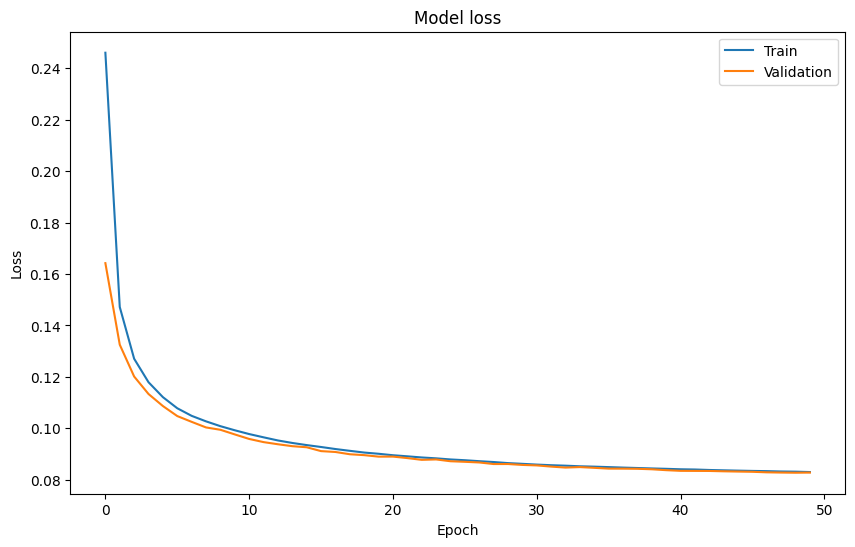

In [9]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
# Predict reconstructed images using the autoencoder
reconstructed_images_flat = autoencoder.predict(x_test_flattened)

# Print the shape of the reconstructed images
print("Shape of reconstructed images:", reconstructed_images_flat.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Shape of reconstructed images: (10000, 784)


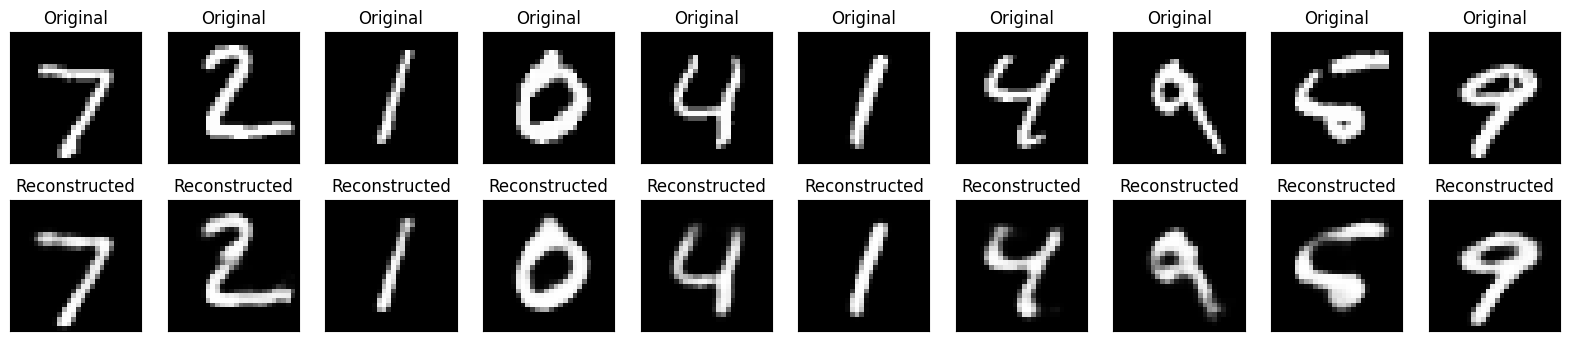

In [11]:
# Reshape the flattened test images and reconstructed images back to original shape
# The original images are 28x28
img_width, img_height = 28, 28
x_test_reshaped = x_test_flattened.reshape(x_test_flattened.shape[0], img_width, img_height)
reconstructed_images_reshaped = reconstructed_images_flat.reshape(reconstructed_images_flat.shape[0], img_width, img_height)


# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_reshaped[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images_reshaped[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Identify and visualize outliers

In [12]:
reconstruction_errors = np.mean(np.square(x_test_flattened - reconstructed_images_flat), axis=1)
print("Shape of reconstruction errors:", reconstruction_errors.shape)

Shape of reconstruction errors: (10000,)


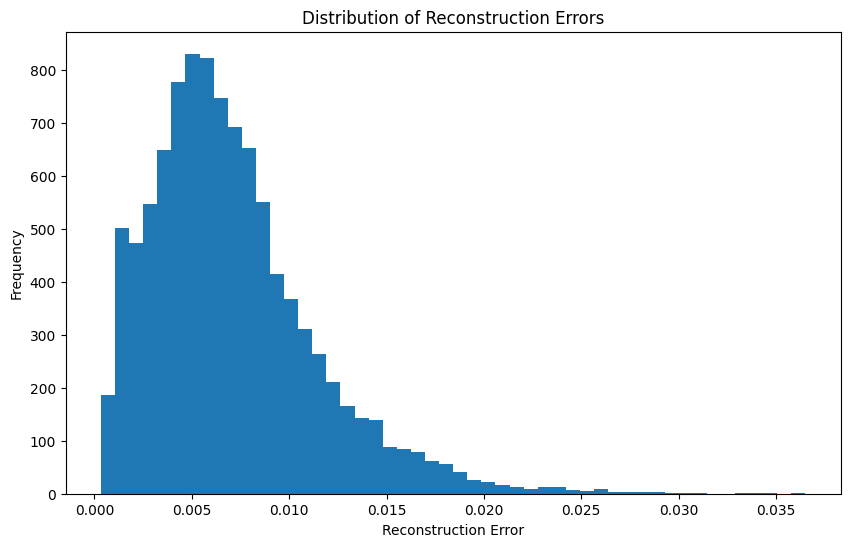

Outlier threshold (95th percentile): 0.015205761417746544


In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Calculate a threshold based on the 95th percentile
outlier_threshold = np.percentile(reconstruction_errors, 95)
print(f"Outlier threshold (95th percentile): {outlier_threshold}")

Number of outliers found: 500


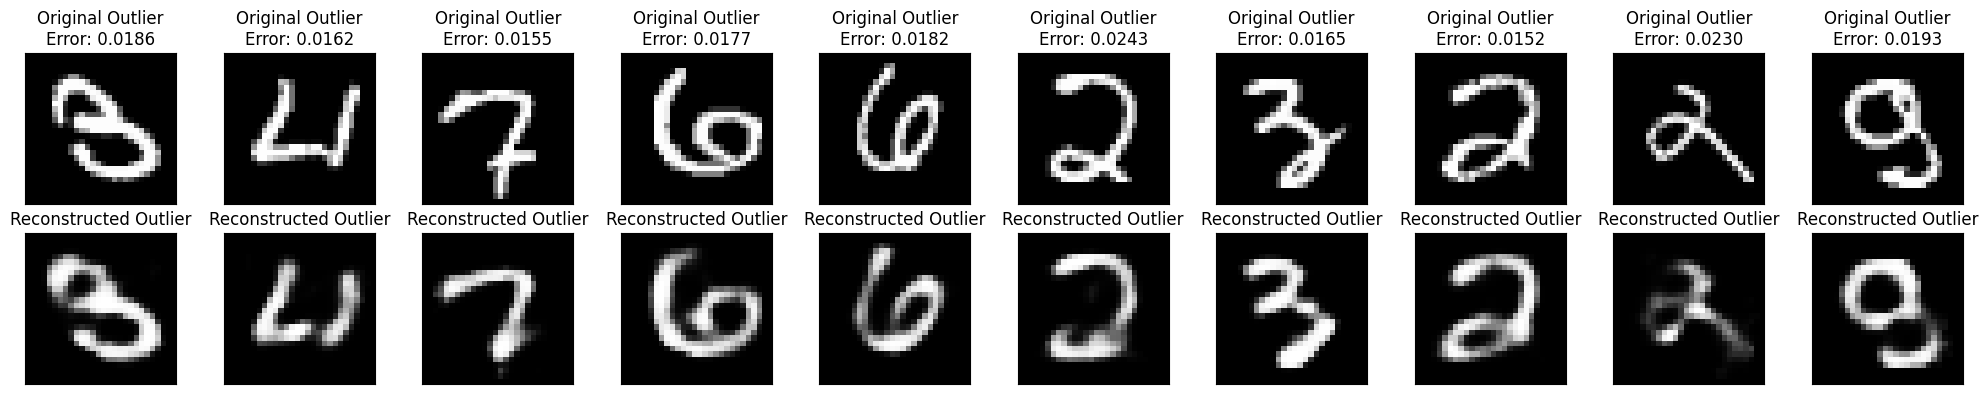

In [14]:
# Find indices of outliers
outlier_indices = np.where(reconstruction_errors > outlier_threshold)[0]
print(f"Number of outliers found: {len(outlier_indices)}")

# Select a subset of outlier indices to visualize
num_outliers_to_visualize = 10
selected_outlier_indices = outlier_indices[:num_outliers_to_visualize]

# Reshape the original test images and reconstructed images for visualization
img_width, img_height = 28, 28
x_test_reshaped = x_test_flattened.reshape(-1, img_width, img_height)
reconstructed_images_reshaped = reconstructed_images_flat.reshape(-1, img_width, img_height)

# Visualize selected outliers
plt.figure(figsize=(20, 4))
for i, outlier_index in enumerate(selected_outlier_indices):
    # Display original outlier image
    ax = plt.subplot(2, num_outliers_to_visualize, i + 1)
    plt.imshow(x_test_reshaped[outlier_index], cmap='gray')
    plt.title(f"Original Outlier\nError: {reconstruction_errors[outlier_index]:.4f}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed outlier image
    ax = plt.subplot(2, num_outliers_to_visualize, i + 1 + num_outliers_to_visualize)
    plt.imshow(reconstructed_images_reshaped[outlier_index], cmap='gray')
    plt.title("Reconstructed Outlier")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()